# Deep Learning for Traffic Sign Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/traffic-sign-classification')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### Import Libraries and Datasets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

### Perform Image Visualization

18

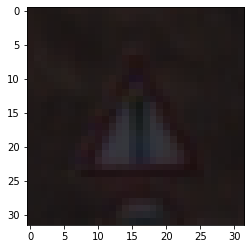

In [7]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

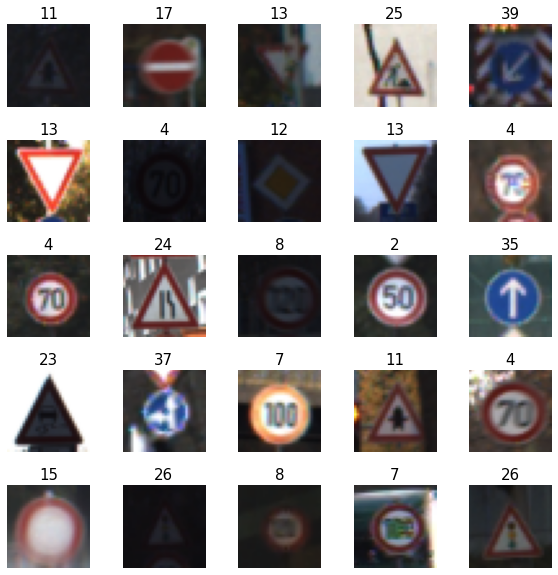

In [8]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# subplot return the figure object and axes object
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

### Convert Images to Grayscale and Perfrom Normalization

In [9]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [10]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [11]:
X_train_gray.shape


(34799, 32, 32, 1)

In [12]:
X_test_gray.shape


(12630, 32, 32, 1)

In [13]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [14]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [15]:
X_train_gray_norm[0]

array([[[ 0.05989583],
        [-0.0390625 ],
        [-0.04947917],
        ...,
        [-0.11979167],
        [-0.12239583],
        [-0.11197917]],

       [[-0.03645833],
        [-0.04427083],
        [-0.05208333],
        ...,
        [-0.1171875 ],
        [-0.1484375 ],
        [-0.13020833]],

       [[-0.0390625 ],
        [-0.09635417],
        [-0.09635417],
        ...,
        [-0.12760417],
        [-0.1328125 ],
        [-0.13541667]],

       ...,

       [[-0.1484375 ],
        [-0.1484375 ],
        [-0.16666667],
        ...,
        [-0.1484375 ],
        [-0.15885417],
        [-0.171875  ]],

       [[-0.14322917],
        [-0.15104167],
        [-0.16145833],
        ...,
        [-0.16927083],
        [-0.1484375 ],
        [-0.1640625 ]],

       [[-0.15364583],
        [-0.14583333],
        [-0.1640625 ],
        ...,
        [-0.13802083],
        [-0.13020833],
        [-0.17708333]]])

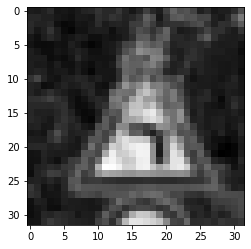

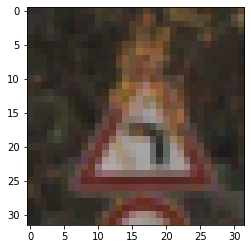

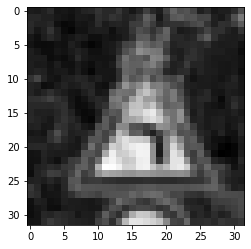

In [16]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

### Build Deep Convolutional Neural Network Model

In [17]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

#CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### Compile and Train Deep CNN Model

In [18]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
history = CNN.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 1s 9ms/step - loss: 3.2446 - accuracy: 0.1539 - val_loss: 2.8724 - val_accuracy: 0.2599
Epoch 2/50
70/70 [==============================] - 0s 5ms/step - loss: 1.8411 - accuracy: 0.4927 - val_loss: 1.6225 - val_accuracy: 0.5370
Epoch 3/50
70/70 [==============================] - 0s 5ms/step - loss: 1.0534 - accuracy: 0.6941 - val_loss: 1.1143 - val_accuracy: 0.6685
Epoch 4/50
70/70 [==============================] - 0s 5ms/step - loss: 0.7383 - accuracy: 0.7912 - val_loss: 0.9305 - val_accuracy: 0.7324
Epoch 5/50
70/70 [==============================] - 0s 5ms/step - loss: 0.5648 - accuracy: 0.8464 - val_loss: 0.7741 - val_accuracy: 0.7778
Epoch 6/50
70/70 [==============================] - 0s 5ms/step - loss: 0.4590 - accuracy: 0.8777 - val_loss: 0.7173 - val_accuracy: 0.7898
Epoch 7/50
70/70 [==============================] - 0s 5ms/step - loss: 0.3861 - accuracy: 0.9001 - val_loss: 0.6718 - val_accuracy: 0.8077
Epoch 8/50
70/70 [==

### Assess Trained CNN Model Performance

In [20]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.2268 - accuracy: 0.8578
Test Accuracy: 0.8577988743782043


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

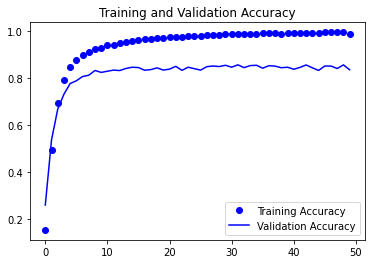

In [23]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

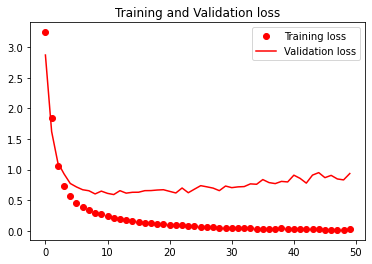

In [24]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [25]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


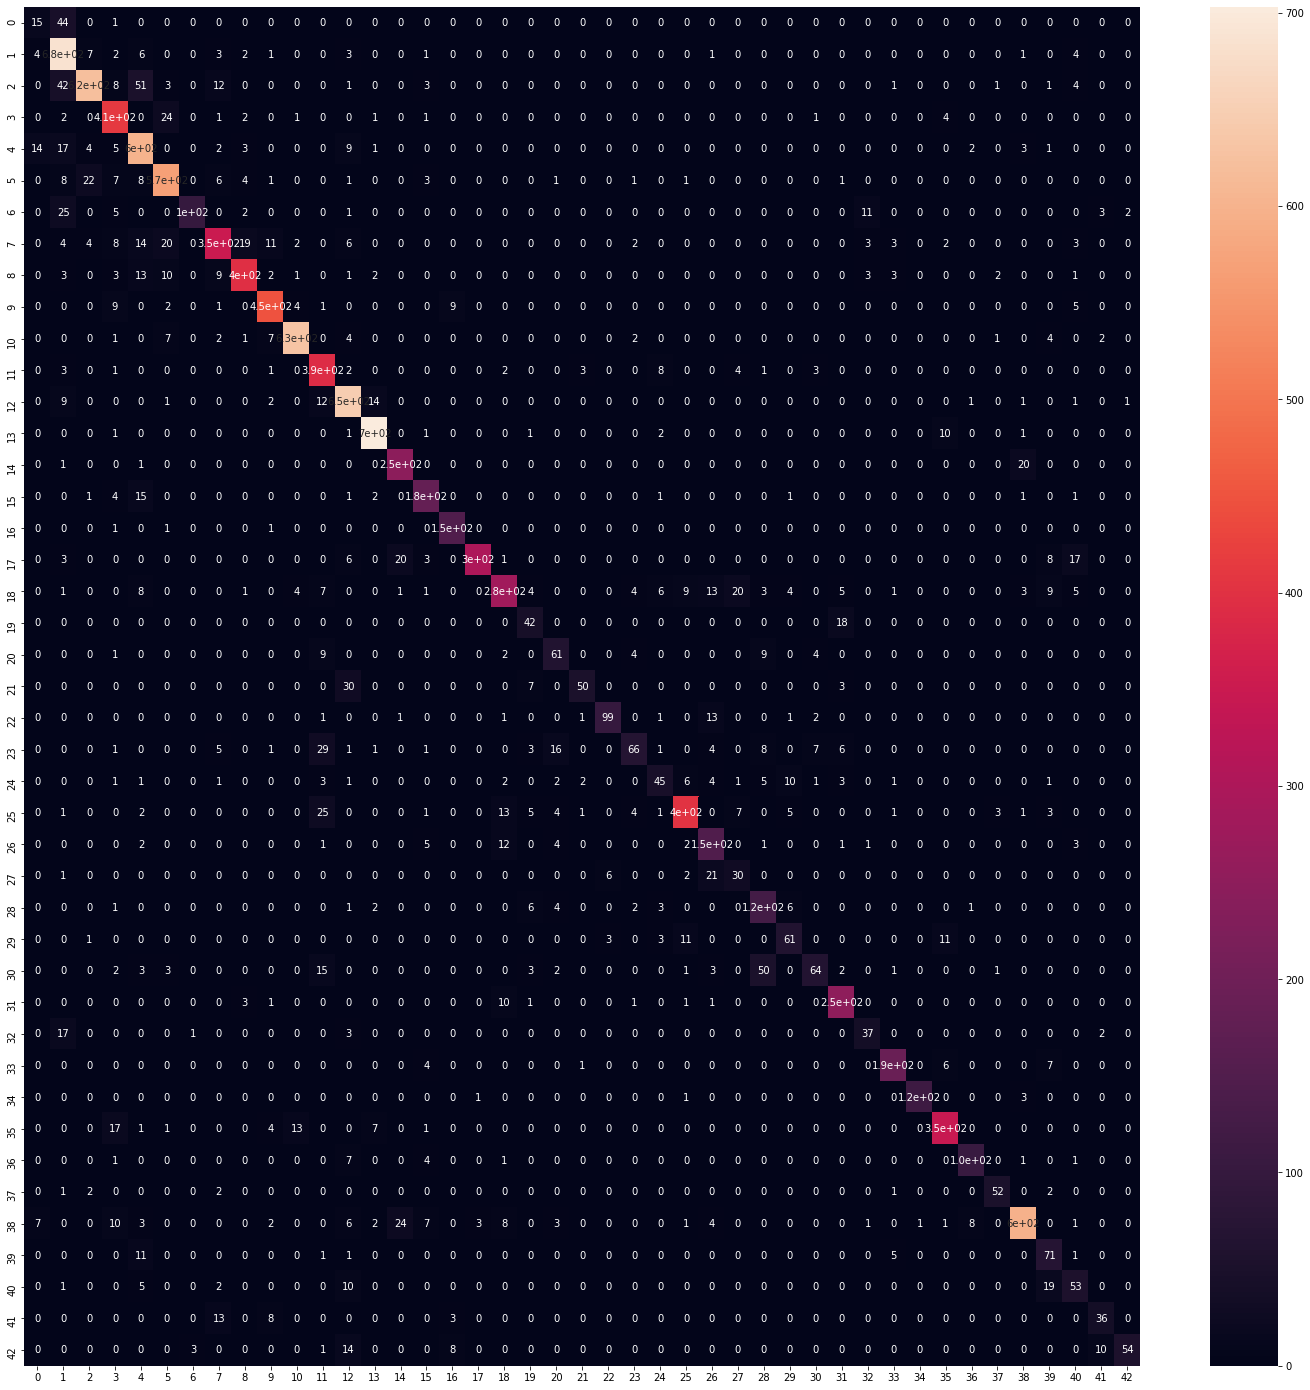

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

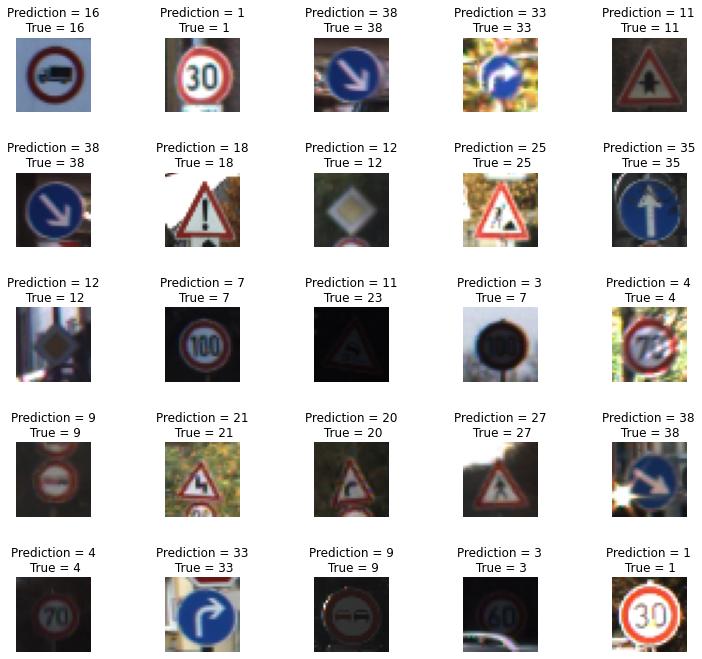

In [27]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    